In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

mouse_metadata = pd.read_csv('./data/Mouse_metadata.csv')
study_results = pd.read_csv('./data/Study_results.csv')

## study_info_complete = pd.merge(mouse_metadata,study_results,on=['Mouse ID'],how='right')
study_info_complete = pd.merge(study_results,mouse_metadata,on=['Mouse ID'],how='left')
## study_info_complete.to_excel('study_info_complete.xlsx')
study_info_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
study_info_complete['Mouse ID'].nunique()

249

In [3]:
duplicates_mouse = study_info_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated = study_info_complete[duplicates_mouse]['Mouse ID'].unique()
duplicated

array(['g989'], dtype=object)

In [4]:
study_info_complete[study_info_complete['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
clean_study_info_complete = study_info_complete[study_info_complete['Mouse ID'] != 'g989']
clean_study_info_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
clean_study_info_complete.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [7]:
mean = clean_study_info_complete.groupby

In [8]:
statistics = pd.DataFrame(clean_study_info_complete.groupby("Drug Regimen").count())
statistics ["Mean"] = pd.DataFrame(clean_study_info_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
statistics ["Median"] = pd.DataFrame(clean_study_info_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
statistics ["Variance"] = pd.DataFrame(clean_study_info_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
statistics ["Std"] = pd.DataFrame(clean_study_info_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
statistics ["SEM"] = pd.DataFrame(clean_study_info_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())



statistics = statistics[["Mean","Median","Variance","Std","SEM"]]
statistics

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
agg_statistics = clean_study_info_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

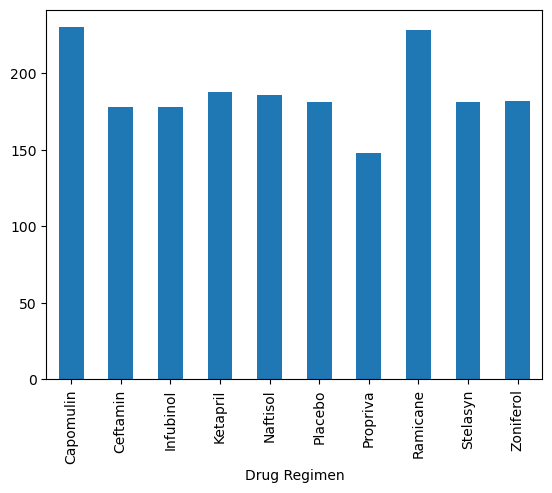

In [16]:
mice_count_by_drug = clean_study_info_complete.groupby('Drug Regimen')['Timepoint'].count()
x_axis = np.arange(len(mice_count_by_drug))
ax = mice_count_by_drug.plot.bar(x=x_axis, y=mice_count_by_drug, rot=90)

Text(0.5, 0, 'Drug Regimen')

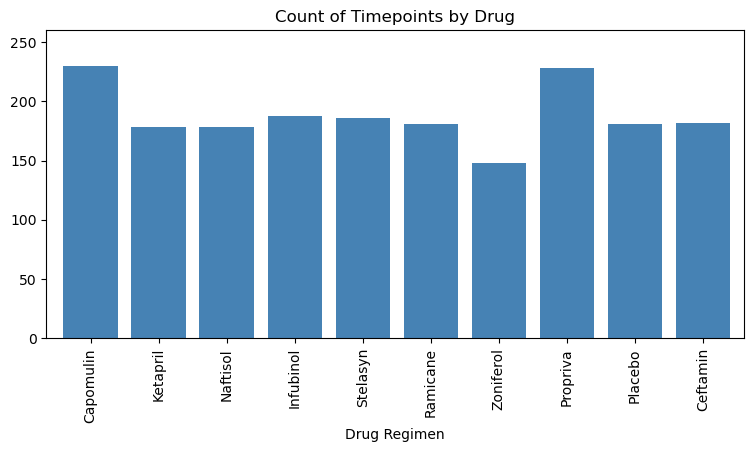

In [19]:
mice_count_by_drug = clean_study_info_complete.groupby('Drug Regimen')['Timepoint'].count()
x_axis = np.arange(len(clean_study_info_complete['Drug Regimen'].unique()))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(x_axis[-1],4))
plt.bar(x_axis, mice_count_by_drug,color='steelblue',alpha=1.0,align="edge")
plt.xticks(tick_locations,clean_study_info_complete['Drug Regimen'].unique(), rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(mice_count_by_drug)+30)
plt.title("Count of Timepoints by Drug")
plt.xlabel("Drug Regimen")

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Sex')

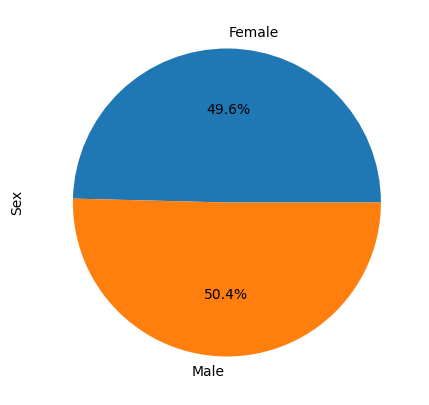

In [22]:
mice_count_by_sex = clean_study_info_complete.groupby('Sex')['Mouse ID'].nunique()
print(mice_count_by_sex)
plot = mice_count_by_sex.plot.pie(y=mice_count_by_sex, autopct='%1.1f%%',figsize=(5,5))
plt.ylabel("Sex")

Text(0, 0.5, 'Sex')

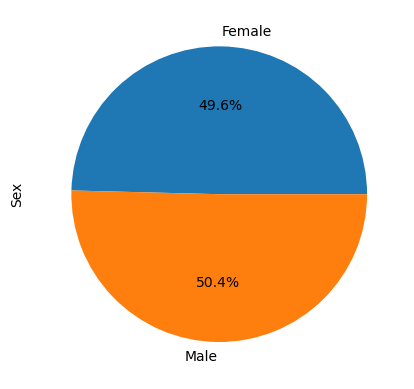

In [23]:
plt.pie(mice_count_by_sex, labels=["Female","Male"], autopct="%1.1f%%")
plt.ylabel("Sex")

In [30]:
max_timepoints = clean_study_info_complete.groupby(['Mouse ID']).max()
max_timepoints
max_df = pd.merge(max_timepoints, clean_study_info_complete, on=["Timepoint", "Mouse ID", "Drug Regimen"])
max_df.reset_index()

max_df

,Timepoint,Mouse ID,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Sex_y,Age_months_y,Weight (g)_y
0,45,a203,67.973419,2,Infubinol,Female,20,23,67.973419,2,Female,20,23
1,45,a251,65.525743,1,Infubinol,Female,21,25,65.525743,1,Female,21,25
2,45,a262,70.717621,4,Placebo,Female,17,29,70.717621,4,Female,17,29
3,45,a275,62.999356,3,Ceftamin,Female,20,28,62.999356,3,Female,20,28
4,30,a366,63.440686,1,Stelasyn,Female,16,29,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,10,z435,48.710661,0,Propriva,Female,12,26,48.710661,0,Female,12,26
244,45,z578,45.000000,0,Ramicane,Male,11,16,30.638696,0,Male,11,16
245,45,z581,62.754451,3,Infubinol,Female,24,25,62.754451,3,Female,24,25
246,45,z795,65.741070,3,Naftisol,Female,13,29,65.741070,3,Female,13,29


In [31]:
Max_val = clean_study_info_complete.groupby(['Mouse ID'])['Timepoint'].max()
Max_val = Max_val.reset_index()
Max_val

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [32]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

for drugs in treatments:
    max_drug = max_df.loc[max_df["Drug Regimen"] == drugs]
    tumor_vol_data.append(max_drug["Tumor Volume (mm3)_y"])
    
    quartiles = max_drug["Tumor Volume (mm3)_y"].quantile([0.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq-lowerq
    
    lowerbound = lowerq-(1.5*IQR)
    upperbound = upperq+(1.5*IQR)
    outliers = max_drug.loc[(max_drug["Tumor Volume (mm3)_y"] > upperbound) | (max_drug["Tumor Volume (mm3)_y"] < lowerbound)]
    
    print(f"{drugs}'s potential outliers: {outliers['Tumor Volume (mm3)_y']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3)_y, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)


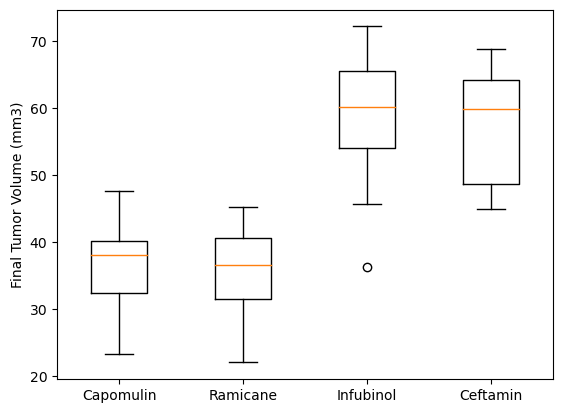

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
ax1.set_xticklabels(treatments)
plt.show() 

In [35]:
single_mouse = clean_study_info_complete.loc[clean_study_info_complete["Mouse ID"] == "b128"]
single_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


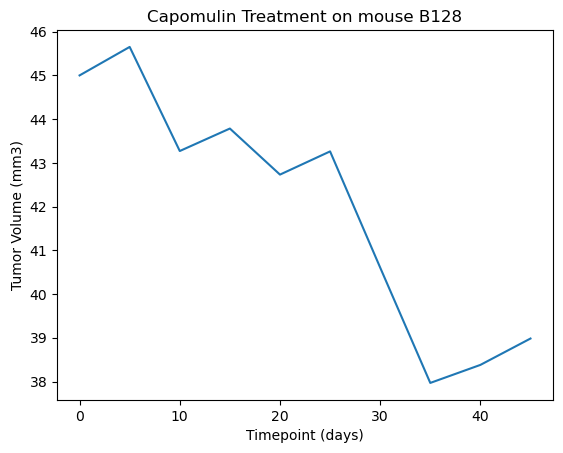

In [36]:
timepoints_single_mouse = single_mouse["Timepoint"]
tumor_vol_single_mouse = single_mouse["Tumor Volume (mm3)"]

plt.plot(timepoints_single_mouse, tumor_vol_single_mouse)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment on mouse B128")
plt.show()

In [37]:
capomulin_treatments = clean_study_info_complete.loc[clean_study_info_complete["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_treatments.groupby(['Mouse ID']).mean()
capomulin_average

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [38]:
y_values = capomulin_average['Tumor Volume (mm3)']
x_values = capomulin_average['Weight (g)']

<function matplotlib.pyplot.show(close=None, block=None)>

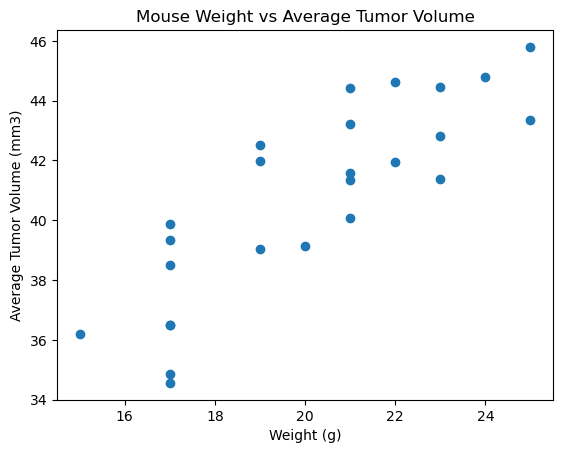

In [39]:
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.tight_layout
plt.show

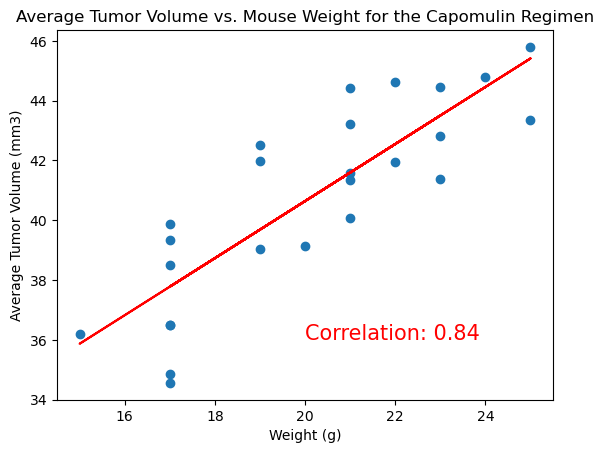

In [45]:
capomulin_df = study_info_complete.loc[study_info_complete["Drug Regimen"] == "Capomulin"]
grouped_df = capomulin_df.groupby(["Mouse ID"])
weight = grouped_df["Weight (g)"].mean()
tumor_vol = grouped_df["Tumor Volume (mm3)"].mean()
plt.scatter(weight, tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
correlation = round(st.pearsonr(weight, tumor_vol)[0],2)
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
plt.plot(weight,regress_values,"r-")
plt.annotate(f'Correlation: {correlation}',(20,36),fontsize=15,color="red")
plt.show()